In [1]:
import numpy as np
import pandas as pd
import os
import glob
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# import tensorflow as tf

from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split


import os
import datetime
from zoneinfo import ZoneInfo
import pandas as pd
import numpy as np
import ffmpeg
import PIL
from PIL import Image
from PIL import ImageOps
# from PIL import Resampling
from matplotlib import cm

In [2]:
!ls

adl001_mat.mp4	       centre1_mat.png	   corner4_mat.png
adl001_mixed.mp4       centre1.mp4	   corner4.mp4
adl001.mp4	       corner1_camera.png  data
adl002_mat.mp4	       corner1_mat.mp4	   decision-tree-classifer.ipynb
adl002_mixed.mp4       corner1_mat.png	   find_odd.ipynb
adl002.mp4	       corner1.mp4	   LICENSE
adl003_mat.mp4	       corner2_camera.png  make_directories.ipynb
adl003_mixed.mp4       corner2_mat.mp4	   mat_camera_align.ipynb
adl003.mp4	       corner2_mat.png	   mat_corners.png
adl004_mat.mp4	       corner2.mp4	   read_mat_camera_data.ipynb
adl004_mixed.mp4       corner3_camera.png  read_timestamps.ipynb
adl004.mp4	       corner3_mat.mp4	   rename_as_timestamp.ipynb
camera_all_points.png  corner3_mat.png	   rename_as_timestamp.py
camera_rescaled.png    corner3.mp4	   subject1.7z
centre1_camera.png     corner4_camera.png
centre1_mat.mp4        corner4_mat.mp4


Utility function to parse the datetime information in the mat data.

In [3]:
def mat_date_reader(d):
    try:
        return datetime.datetime.strptime(d, '%Y-%m-%dT%H:%M:%S.%f%z')
    except ValueError:
        return datetime.datetime.strptime(d, '%Y-%m-%dT%H:%M:%S%z')

Read one particular data file.

In [27]:
mframe = pd.read_csv('data/mat_data/Lyne/ADL Mat/LMATADL2/LA2.csv', 
                     converters={'Timestamp': mat_date_reader},
                    index_col='Frame')
mframe.dtypes

Timestamp           datetime64[ns, UTC+01:00]
Range Min (mmHg)                        int64
Range Max (mmHg)                        int64
0                                       int64
1                                       int64
                              ...            
1723                                    int64
1724                                    int64
1725                                    int64
1726                                    int64
1727                                    int64
Length: 1731, dtype: object

In [28]:
mframe

,Timestamp,Range Min (mmHg),Range Max (mmHg),0,1,2,3,4,5,6,...,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727
Frame,,,,,,,,,,,,,,,,,,,,,
1,2024-07-29 11:06:57.544000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2024-07-29 11:06:57.576000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2024-07-29 11:06:57.609000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2024-07-29 11:06:57.641000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2024-07-29 11:06:57.674000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,2024-07-29 11:07:11.476000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
431,2024-07-29 11:07:11.508000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
432,2024-07-29 11:07:11.541000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
mframe_trimmed = mframe.drop(['Timestamp', 'Range Min (mmHg)', 'Range Max (mmHg)'], axis='columns')
mframe_trimmed

,0,1,2,3,4,5,6,7,8,9,...,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727
Frame,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
mframe_trimmed.astype('bool').sum(axis='columns')

Frame
1      0
2      0
3      0
4      0
5      0
      ..
430    0
431    0
432    0
433    0
434    0
Length: 434, dtype: int64

<Axes: ylabel='Frequency'>

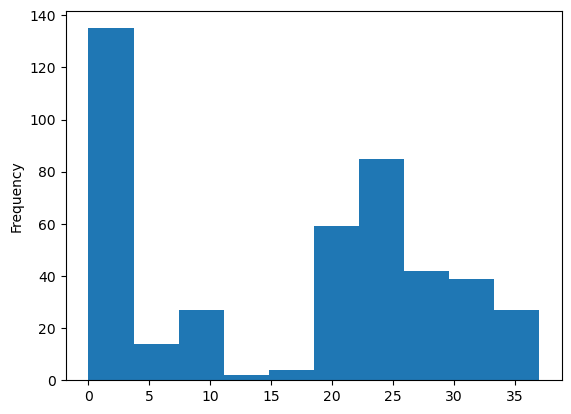

In [69]:
mframe_trimmed.astype('bool').sum(axis='columns').plot.hist()

In [50]:
mframe_trimmed.loc[95:100].astype('bool').sum(axis='columns')

Frame
95     5
96     5
97     6
98     6
99     7
100    7
dtype: int64

In [56]:
mframe_trimmed.astype('bool').sum(axis='columns') > 10

Frame
1      False
2      False
3      False
4      False
5      False
       ...  
430    False
431    False
432    False
433    False
434    False
Length: 434, dtype: bool

In [70]:
at_least_some_pixels = mframe_trimmed.astype('bool').sum(axis='columns') > 2
not_too_many_pixels = mframe_trimmed.astype('bool').sum(axis='columns') < 37
mframe_with_pixels = mframe[at_least_some_pixels & not_too_many_pixels]
mframe_with_pixels

,Timestamp,Range Min (mmHg),Range Max (mmHg),0,1,2,3,4,5,6,...,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727
Frame,,,,,,,,,,,,,,,,,,,,,
95,2024-07-29 11:07:00.619000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,2024-07-29 11:07:00.652000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,2024-07-29 11:07:00.684000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,2024-07-29 11:07:00.716000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,2024-07-29 11:07:00.748000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,2024-07-29 11:07:10.150000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
390,2024-07-29 11:07:10.182000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
391,2024-07-29 11:07:10.214000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
mn = mframe_with_pixels.index.min()
mx = mframe_with_pixels.index.max()
mn, mx

(95, 393)

In [37]:
mn = mframe[mframe_trimmed.astype('bool').sum(axis='columns') > 5].index.min()
mx = mframe[mframe_trimmed.astype('bool').sum(axis='columns') > 5].index.max()
mn, mx

(97, 392)

In [76]:
mframe.loc[mn:mx]

,Timestamp,Range Min (mmHg),Range Max (mmHg),0,1,2,3,4,5,6,...,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727
Frame,,,,,,,,,,,,,,,,,,,,,
95,2024-07-29 11:07:00.619000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,2024-07-29 11:07:00.652000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,2024-07-29 11:07:00.684000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,2024-07-29 11:07:00.716000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,2024-07-29 11:07:00.748000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,2024-07-29 11:07:10.150000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
390,2024-07-29 11:07:10.182000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
391,2024-07-29 11:07:10.214000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
mframe.loc[mn:mx].to_csv('trimmed_mframe.csv')